In [ ]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score


# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
notebook_start_time = time.time()

## 1. HR Analytics

### 1.1 Load and Sample the data

In [ ]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [ ]:
df_hr.info()

In [ ]:
df_hr.head()

In [ ]:
df_hr.describe()

In [ ]:
df_hr.isnull().sum()

In [ ]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

### 1.1.1 Train and Test splits 

In [ ]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.1.2 Feature Importances 

In [ ]:
# using logit - for classification 
lgsm = sm.Logit(y_train, X_train).fit()

In [ ]:
lgsm.summary()

### 1.2 Build the Model(s)

In [ ]:
models = []

model_names = []

In [ ]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

In [ ]:
# decision tree classifier 
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

In [ ]:
# random forest classifier 
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

In [ ]:
# support vector machine 
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

In [ ]:
# multi layer perceptron
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

In [ ]:
# adaptive boosting
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

In [ ]:
# extreme gradient boosting 
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.2.1 Consolidated View of Model Scores

In [ ]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

### 1.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Classifier</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

In [ ]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    # Training scores and report
    train_pred = model.predict(X_train)
    print('\nTraining report:')
    print(classification_report(y_train, train_pred))

    # Testing scores and report
    test_pred = model.predict(X_test)
    print('\nTesting report:')
    print(classification_report(y_test, test_pred))

    # Confusion matrix for training
    print('\nConfusion Matrix:')
    train_cm = confusion_matrix(y_train, train_pred)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training')

    # Confusion matrix for testing
    plt.subplot(1, 2, 2)
    test_cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')

    plt.tight_layout()
    plt.show()

### 1.3.1 Model 1 (random forest classifier) 

In [ ]:
model_scores_classification(rf)

##### comments 
- the model scores are very overfitted which need to be tuned
- high variance and low bias, the model is performing well on training set but not as good on training set, meaning it is putting in close attention to the train set
- it is this way due to the 'nature' of random forest

### 1.3.1.1 Hyperparameter Inspection
##### hyperparams to be tweaked or that can be tweaked 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 
- <mark>max_features</mark> : number of features to consider for a best split 

### 1.3.1.1 (a)  n_estimators

##### n_estimators vs. train and test scores  (range : 100-1000)

In [ ]:
n_estimators_values = np.arange(100,1100,100)

# Initialize lists to store training and test scores
train_scores = []
test_scores = []

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores and store them
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test Accuracy', marker='o')
plt.title('Random Forest Classifier: Training and Test Scores vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 1.3.1.1 (b) max_depth 

##### max depth vs accuracy (range: 2-20), we start lower 

In [ ]:
max_depths = np.arange(2, 21,1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

In [ ]:
max_depths = np.arange(10, 100,10)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different max_depth values
for max_depth in max_depths:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

### 1.3.1.1 (c) min_samples_split

##### min samples vs accuracy (range: 2-100), start from default 

In [ ]:
min_samples_splits = np.arange(2, 100, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# overfitting gets reduced, but test scores typically dont increase
# reduced overfitting but it compromises train scores

##### min samples vs accuracy (range: 100-1000), see higher to see effect

In [ ]:
min_samples_splits = np.arange(100, 1100, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_splits:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Min Samples Split vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# too many samples makes the model become worse

### 1.3.1.1 (d) min_samples_leaf 

##### min samples leaf vs accuracy (range: 2-20), start from default

In [ ]:
min_samples_leafs = np.arange(1, 21, 1)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leafs:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on the training and testing sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.plot(min_samples_leafs, train_accuracies, label='Training Accuracy')
plt.plot(min_samples_leafs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Min Samples Leaf vs Accuracy for Random Forest Classifier')
plt.legend()
plt.show()

# doing so reduces overfitting

### 1.3.1.2 Optimizing Hyperparameters

### 1.3.1.2 (a) GridSearchCV 

##### 1st Iteration  

In [ ]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20]}# where the model tends to be the best at lower depths

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
rf2 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=10
                             ,min_samples_split=60,n_estimators=70,random_state=42).fit(X_train,y_train)

model_scores_classification(rf2)

# reduced overfitting, but the test scores went lower 

##### 2nd iteration - set it at a higher range for all params to try to increase accuracy 

In [ ]:
param_grid = {'n_estimators' : [100,200,300], 
              'criterion' : ['gini','entropy'],
              'max_depth' : [30,50,70],
              'min_samples_split':[100,200,300],
              'min_samples_leaf':[30,50,70]}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
rf3 = RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_leaf=30
                             ,min_samples_split=100,n_estimators=100,random_state=42).fit(X_train,y_train)

model_scores_classification(rf3)

# overfitting is reduced but accuracies slightly decrease
# lower params are better accuracies

##### 3rd iteration - added class weights to 1st iteration

In [ ]:
param_grid = {'n_estimators' : [40,50,60,70], # this is where the model tends to be at its best, and at lower number of trees 
              'criterion' : ['gini','entropy'],
              'max_depth' : [10,20,30],
              'min_samples_split':[60,80,100],
              'min_samples_leaf':[10,15,20],
              'class_Weights' : ['balanced','balanced_subsample']}

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

### 1.3.2 Model 2 (MLP) 

In [ ]:
model_scores_classification(mlp)

### 1.3.2.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### 1.3.2.1 (a) hidden_layer_sizes

##### hidden layer sizes (brain size) against train and test

In [ ]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
hidden_layer_sizes = [(i,) for i in range(10, 110, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### 1.3.2.1 (b) max_iter 

##### max_iter against accuracies (range : 100-1000)

In [ ]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

In [ ]:
max_iters = [i for i in range(100, 1000, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

# scores tend to plateau at a high number of iterations

##### max_iter and solvers vs train score 

In [ ]:
max_iters = [i for i in range(10, 110, 10)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers

In [ ]:
max_iters = [i for i in range(100, 1100, 100)]
solvers = ['lbfgs', 'sgd', 'adam']

# Create a dictionary to store training scores for each solver
train_scores = {solver: [] for solver in solvers}

# Train MLP models with different max_iter values and solvers
for solver in solvers:
    for max_iter in max_iters:
        model = MLPClassifier(max_iter=max_iter, solver=solver, random_state=42)
        
        # Train the model on the training set
        model.fit(X_train, y_train)
        
        # Evaluate accuracy on the training set
        train_accurbacy = model.score(X_train, y_train)
        train_scores[solver].append(train_accuracy)

# Plotting the graph for different solvers
for solver in solvers:
    plt.plot(max_iters, train_scores[solver], marker='o', label=f'Train Set ({solver} solver)')

plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Training Accuracy for MLP Model (Different Solvers)')
plt.legend()
plt.show()

# according to documentation, 'lbfgs' solver is better for smaller and lesser complex datasets
# warnings show here that the model is not converging, it might need alot more iterations for it to converge as
# compared to other solvers
# sometimes the model does not converge for other solvers as well 

### 1.3.2.2 Optimizing Hyperparameters 

### 1.3.2.2 (a) GridSearchCV

In [ ]:
mlp_models = [mlp]
mlp_names = ['base']

##### 1st iteration - low set of max_iter

In [ ]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [40,50,60]} # start with a lower set of iterations 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp2 = MLPClassifier(activation='relu',hidden_layer_sizes=(100,),max_iter = 50,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp2)
mlp_models.append(mlp2)
mlp_names.append('mlp2 - low iterations')


# no change in scores, we need to try to increase it 

##### 2nd iteration - higher iterations 
- in the previous search, we used relatively large number neurons with little iterations, which might be why the scores are not as optimal

In [ ]:
param_grid = {'hidden_layer_sizes' : [(50,),(100,),(200,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [100,200,300]} # more iterations for the model to learn? 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp3 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp3)
mlp_models.append(mlp3)
mlp_names.append('mlp3 - higher iterations')

# scores increase with close f1 scores

##### 3rd iteration - trying higher layers and higher iterations 
- for the model to learn better 

In [ ]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,),(400,)],
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['adam','sgd'], # we dont use lbfgs as it is a large dataset 
              'max_iter' : [500,700,1000]} # more iterations for the model to learn? 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp4 = MLPClassifier(activation='logistic',hidden_layer_sizes=(300,),max_iter = 500
                     ,solver='adam',random_state=42).fit(X_train,y_train)

model_scores_classification(mlp4)
mlp_models.append(mlp4)
mlp_names.append('mlp4 - higher iterations,layers')

# train score remained the same 
# test score decreased
# how to improve test score?  

##### 4th iteration - add regularisation parameter 
- to reduce overfitting, we try to implement regularization (alpha) 
- instead of using gridsearch, we see the effect of regularization for the specific model mlp2 (previously optimized) 

In [ ]:
alphas = np.logspace(-6, 3, 10)

# Calculate training and test scores at different alpha values
train_scores, test_scores = validation_curve(
    mlp4, X_train, y_train, param_name='alpha', param_range=alphas, cv=5, scoring='accuracy'
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, np.mean(train_scores, axis=1), label='Training score', marker='o')
plt.semilogx(alphas, np.mean(test_scores, axis=1), label='Cross-validation score', marker='o')
plt.title('Validation Curve for MLPClassifier')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mlp5 = MLPClassifier(activation='logistic',hidden_layer_sizes=(200,),max_iter = 200
                     ,solver='adam',alpha=0.0001,random_state=42).fit(X_train,y_train)

model_scores_classification(mlp5)
mlp_models.append(mlp5)
mlp_names.append('mlp5 - regularisation added')

# no change in scores 

### 1.3.3.3 'optimized' models

In [ ]:
scores_table = []
for model, name in zip(mlp_models, mlp_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores_mlp = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores_mlp

### 1.3.3 Model 3 (ADA)

### 1.3.3.1 Hyperparameter Inspection 
##### hyperparams to be tweaked or that can be tweaked 
- <mark>estimator</mark> : we can use the previous models
- <mark>n_estimators</mark> : number of estimators 
- <mark>learning_rate</mark> : learning rate, weight applied at each iteration 
- <mark>algorithm</mark> : algorithm 

### 1.3.3.1 (a) n_estimators 

##### n_estimators against model accuracies 

In [ ]:
estimators = [i for i in range(100, 1100, 10)]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different n_estimators values
for n_estimators in estimators:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(estimators, train_accuracies,label='Train Set')
plt.plot(estimators, test_accuracies,label='Test Set')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Number of Estimators vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

# scores tend to see increases for the train set, but for the test set it is inconsistent 
# we can try to strike a balance for it 

### 1.3.3.1 (b) learning_rate

###### learning rate against model accuracies 

In [ ]:
learning_rates = [0.01, 0.1, 0.5, 1.0]

train_accuracies = []
test_accuracies = []

# Train AdaBoost models with different learning rates
for learning_rate in learning_rates:
    model = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(learning_rates, train_accuracies, marker='o', label='Train Set')
plt.plot(learning_rates, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy for AdaBoost Classifier')
plt.legend()
plt.show()

### 1.3.3.2 Optimizing Hyperparameters 

### 1.3.3.2 (a) GridSearchCV 

##### 1st iteration - lower estimators

In [ ]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.6,0.8,1],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada2 = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=300,random_state=42).fit(X_train,y_train)

model_scores_classification(ada2)

# train and test scores increase but is slightly overfit

##### 2nd iteration - lower learning rate 
- high learning rates tend to lead to overfitting 

In [ ]:
param_grid = {'n_estimators' : [200,300,400],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada3  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=400,random_state=42).fit(X_train,y_train)

model_scores_classification(ada3)

# overfitting is reduced 

##### 3rd iteration - use lower number of estimators 
- higher estimators leads to overfitting due to complexity? (confirm this)

In [ ]:
param_grid = {'n_estimators' : [50,100,200],
              'learning_rate' : [0.2,0.4,0.6],
              'algorithm' : ['SAMME.R','SAMME']}

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=ada, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
ada4  = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.6,n_estimators=200,random_state=42).fit(X_train,y_train)

model_scores_classification(ada4)

# lower iterations leads test score to be lower? 

##### 4th iteration - use rf3 as a base estimator

## 2. Airbnb

In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score


# model opitmization
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# time - test
import time

# math 
from math import sqrt

# statistical models 
import statsmodels.api as sm

# regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

### 2.1 Load and Sample the data

In [2]:
df_bnb = pd.read_csv('./bnb_transformed.csv')

In [3]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         6307 non-null   int64  
 1   neighbourhood                   6307 non-null   int64  
 2   latitude                        6307 non-null   float64
 3   longitude                       6307 non-null   float64
 4   room_type                       6307 non-null   int64  
 5   price                           6307 non-null   float64
 6   minimum_nights                  6307 non-null   float64
 7   number_of_reviews               6307 non-null   float64
 8   reviews_per_month               6307 non-null   float64
 9   calculated_host_listings_count  6307 non-null   float64
 10  availability_365                6307 non-null   float64
 11  last_review_year                6307 non-null   float64
 12  last_review_month               63

In [4]:
df_bnb.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,cosy,cozy,mins,mrt,near,orchard,private,room,spacious,studio
0,227796,131,1.746376,-2.626110,1,81.0,1.729361,1.157713,0.217513,-0.684275,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,1.000000,0.0,0.0
1,1439258,469,-0.904317,-1.710715,1,44.0,1.084695,1.157713,0.137405,-0.226308,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.641676,0.0,0.0
2,1439258,469,-0.927419,-1.596939,1,40.0,1.406505,0.879358,-0.124190,-0.226308,...,0.0,0.0,0.720567,0.48444,0.0,0.0,0.0,0.496085,0.0,0.0
3,1521514,134,0.463587,-0.512277,1,65.0,-0.547453,1.647549,1.060556,-0.610410,...,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,1439258,469,-0.842913,-1.677979,1,44.0,1.406505,1.008257,-0.021196,-0.226308,...,0.0,0.0,1.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [5]:
df_bnb.isnull().sum()

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
last_review_year                  0
last_review_month                 0
last_review_day                   0
apartment                         0
apt                               0
bed                               0
bedroom                           0
br                                0
central                           0
city                              0
condo                             0
cosy                              0
cozy                              0
mins                              0
mrt                               0
near                              0
orchard                     

In [6]:
df_bnb.describe()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,cosy,cozy,mins,mrt,near,orchard,private,room,spacious,studio
count,6.307000e+03,6307.000000,6.307000e+03,6.307000e+03,6307.000000,6307.000000,6.307000e+03,6.307000e+03,6.307000e+03,6.307000e+03,...,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000
mean,9.268678e+07,581.983986,1.344935e-14,4.870975e-13,1.537498,156.268432,-2.632603e-15,2.269354e-14,-2.547581e-15,1.496750e-15,...,0.038088,0.038503,0.034565,0.105723,0.085033,0.044024,0.045422,0.119620,0.051807,0.067715
std,8.377692e+07,327.440241,1.000079e+00,1.000079e+00,0.599170,98.686740,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,...,0.161810,0.159995,0.150851,0.232204,0.214786,0.170141,0.178046,0.275969,0.181525,0.215714
min,2.366600e+04,101.000000,-3.632829e+00,-3.501983e+00,0.000000,35.000000,-1.236524e+00,-1.132311e+00,-1.180403e+00,-6.842753e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.114972e+07,362.000000,-7.690466e-01,-4.677651e-01,1.000000,81.000000,-5.474529e-01,-1.132311e+00,-1.180403e+00,-6.547290e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.344891e+07,477.000000,1.444091e-01,-6.675572e-02,2.000000,135.000000,-1.463868e-01,-1.756958e-02,6.399646e-02,-4.922244e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.598048e+08,994.000000,6.596528e-01,4.478298e-01,2.000000,208.000000,8.409538e-01,9.270265e-01,8.235087e-01,2.907525e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.885676e+08,1043.000000,3.781817e+00,2.683822e+00,2.000000,394.000000,1.729361e+00,1.647549e+00,1.733648e+00,3.348795e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.1.1 Train and Test Splits 

In [7]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.1.2 Feature Importances

In [8]:
# using OLS model to see the p-values and coefficients 
ols = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              795.9
Date:                Thu, 01 Feb 2024   Prob (F-statistic):                        0.00
Time:                        13:46:07   Log-Likelihood:                         -25086.
No. Observations:                4414   AIC:                                  5.023e+04
Df Residuals:                    4383   BIC:                                  5.043e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                         4.388e-08   1.45e-08      3.036      0.002    1.55e-08    7.22e-08
neighbourhood                     -0.0139      0.004     -3.523      0.000      -0.022      -0.006
latitude                          -8.0632      1.172     -6.879      0.000     -10.361      -5.765
longitude                         -1.2555      1.364     -0.920      0.357      -3.930       1.419
room_type                        100.8261      2.061     48.912      0.000      96.785     104.867
minimum_nights                   -20.2104      1.241    -16.283      0.000     -22.644     -17.777
number_of_reviews                 -8.3875      2.778     -3.019      0.003     -13.834      -2.941
reviews_per_month                  0.6697      2.879      0.233      0.816      -4.975       6.314
calculated_host_listings_count    -9.7985      1.431     -6.846      0.000     -12.604      -6.993
availability_365                  15.6010      1.175     13.283      0.000      13.298      17.904
last_review_year                  -0.0007      0.003     -0.258      0.796      -0.006       0.005
last_review_month                 -0.4210      0.552     -0.763      0.446      -1.503       0.661
last_review_day                    0.3367      0.151      2.231      0.026       0.041       0.633
apartment                         15.2260      5.080      2.997      0.003       5.267      25.185
apt                              -14.5068      6.197     -2.341      0.019     -26.655      -2.358
bed                               10.1944      5.989      1.702      0.089      -1.547      21.936
bedroom                           25.0961      5.161      4.863      0.000      14.978      35.214
br                                62.4632      5.223     11.958      0.000      52.223      72.704
central                            5.7609      6.552      0.879      0.379      -7.085      18.607
city                             -13.9327      5.350     -2.604      0.009     -24.421      -3.445
condo                             -8.6539      6.647     -1.302      0.193     -21.685       4.377
cosy                             -36.1932      6.551     -5.525      0.000     -49.036     -23.351
cozy                             -41.1451      6.839     -6.016      0.000     -54.553     -27.738
mins                             -22.3313      7.248     -3.081      0.002     -36.541      -8.121
mrt                                7.9117      5.047      1.567      0.117      -1.984      17.807
near                              -4.2160      5.122     -0.823      0.410     -14.257       5.825
orchard                           38.3296      6.484      5.911      0.000      25.617      51.042
private       

In [9]:
# choose which features to drop in train and test 

columns_to_drop = ['apartment', 'apt', 'bed', 'bedroom', 'br', 'central', 'city', 'condo', 'cosy', 'cozy', 
                   'mins', 'near', 'orchard', 'room', 'studio','longitude','latitude']

X_train = X_train.drop(columns=columns_to_drop)

X_test = X_test.drop(columns=columns_to_drop)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4414 entries, 6206 to 860
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         4414 non-null   int64  
 1   neighbourhood                   4414 non-null   int64  
 2   room_type                       4414 non-null   int64  
 3   minimum_nights                  4414 non-null   float64
 4   number_of_reviews               4414 non-null   float64
 5   reviews_per_month               4414 non-null   float64
 6   calculated_host_listings_count  4414 non-null   float64
 7   availability_365                4414 non-null   float64
 8   last_review_year                4414 non-null   float64
 9   last_review_month               4414 non-null   float64
 10  last_review_day                 4414 non-null   float64
 11  mrt                             4414 non-null   float64
 12  private                         

### 2.2 Build the Model(s)

In [11]:
models = []

model_names = []

In [12]:
# linear regression
lr = LinearRegression().fit(X_train,y_train)

models.append(lr)
model_names.append('LinearRegression')

In [13]:
# decision tree regressor
dtr = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

models.append(dtr)
model_names.append('DTree Regressor')

In [14]:
# random forest regressor 
rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)

models.append(rfr)
model_names.append('Random Forest Regressor')

In [15]:
# SVR
svr = SVR().fit(X_train, y_train)

models.append(svr)
model_names.append('SVR')

In [16]:
# adaptive boosting 
ada_r = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

models.append(ada_r)
model_names.append('ADA Boost')

In [17]:
# XGB
xgb_r = XGBRegressor(random_state=42).fit(X_train, y_train)

models.append(xgb_r)
model_names.append('XG Boost')

In [18]:
# multilayer perceptron
mlp_r = MLPRegressor(random_state=42).fit(X_train,y_train)

models.append(mlp_r)
model_names.append('Multilayer Perceptron')

### 2.2.1 Consolidated View of Model Accuracies 

In [19]:
results = []

for model, model_name in zip(models, model_names):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Calculate metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,LinearRegression,76.251880,80.042311,0.389106,0.374134
1,DTree Regressor,7.881719,86.985652,0.993473,0.260842
2,Random Forest Regressor,23.769790,63.447484,0.940637,0.606748
3,SVR,98.445795,102.874804,-0.018261,-0.033856
4,ADA Boost,76.823480,80.526183,0.379913,0.366544
5,XG Boost,27.245337,63.935476,0.922008,0.600676
6,Multilayer Perceptron,130.209932,134.809253,-0.781365,-0.775339


### 2.3 Evaluate and Improve the Model(s)
These models will be chosen for further evaluation and tuning  : <mark>Random Forest Regressor</mark>, <mark>SVR</mark>,<mark>XG Boost</mark>.

In [20]:
def model_scores_regression(model):
    print(f"Model : {model}:\n")
    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on the testing set
    y_test_pred = model.predict(X_test)
    
    # Calculated the RMSE and R^2 for training set
    print('R-Square:')
    print(model.score(X_train, y_train), '(Train R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    print(model.score(X_test, y_test), '(Test R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    
    # Create subplot for training set
    plt.figure(figsize=(12, 5))  # Adjust the figure size
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Actual vs. Predicted (Training)')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Training Set: Fitted against Predicted Plot")
    plt.legend()
    
    print()
    
    print('RMSE:')
    # Calculated the RMSE and R^2 for testing set
    print(sqrt(mean_squared_error(y_train_pred, y_train)), '(Train RMSE)')  # RMSE: the lower the better
    print(sqrt(mean_squared_error(y_test_pred, y_test)), '(Test RMSE)')  # RMSE: the lower the better
    
    # Create subplot for testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, label='Actual vs. Predicted (Testing)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Testing Set: Fitted against Predicted Plot")
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

### 2.3.1 Model 1 (Random Forest Regressor) 

Model : RandomForestRegressor(random_state=42):

R-Square:
0.9406370790736936 (Train R^2 Value)
0.6067481787964633 (Test R^2 Value)

RMSE:
23.769789991506137 (Train RMSE)
63.44748441952988 (Test RMSE)


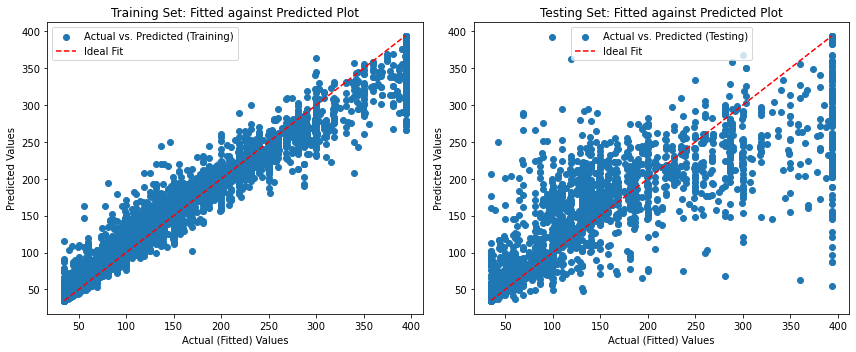

In [21]:
model_scores_regression(rfr)
# the model is very overfitted 

### 2.3.1.1 Hyperparameter Inspection 
- <mark>n_estimators</mark> : number of trees
- <mark>criterion</mark> : quality of split
- <mark>max_depth</mark> : depth of tree, if there are too many details it might lead to overfitting? affected by:min_samples_split samples
- <mark>min_samples_split</mark> : number of samples required to split an internal node 
- <mark>min_samples_leaf</mark> : number of samples required to become a leaf? makes model more generalised (add later on?) 
- <mark>max_features</mark> : number of features to consider for a best split 

### 2.3.1.1 (a) n_estimators

##### n_estimators vs. rsq (range: 10-100)

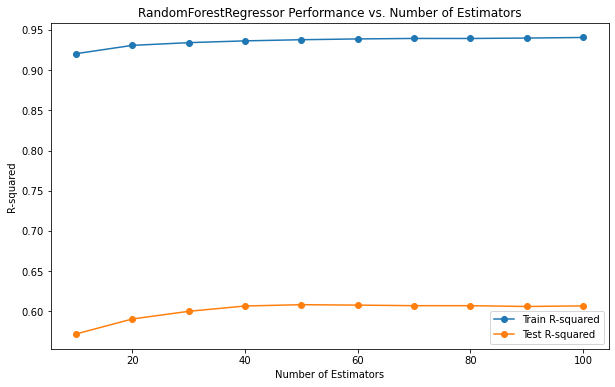

In [22]:
n_estimators_values = np.arange(10, 110, 10)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Calculate and store train and test scores (using R-squared)
    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# train score is so high - why? 

##### n_estimators vs rsq (range: 100-1000)
- more estimators might make the model more complext

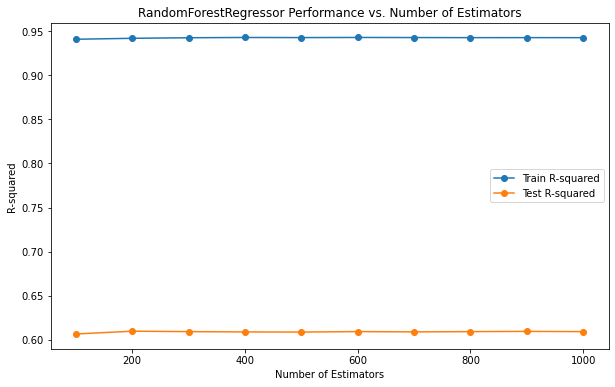

In [23]:
n_estimators_values = np.arange(100, 1100, 100)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and fit the RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    
    # Calculate and store train and test scores (using R-squared)
    train_scores.append(rf_regressor.score(X_train, y_train))
    test_scores.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# the values tend to plateau as we go higher
# need to either reduce the train score or increase the test score

### 2.3.1.1 (b) max_depth

##### max_depth - cross val accuracy

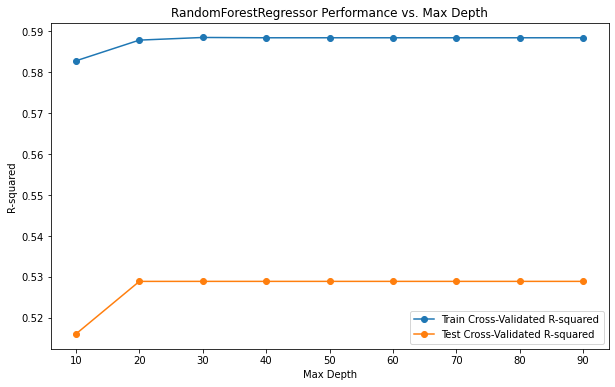

In [24]:
max_depth_values = np.arange(10, 100,10)

# Lists to store cross-validated R-squared values for both training and testing
train_cross_val_rsq_values = []
test_cross_val_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Calculate cross-validated R-squared values for training set
    train_cross_val_rsq = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate cross-validated R-squared values for testing set
    test_cross_val_rsq = cross_val_score(rf_regressor, X_test, y_test, cv=5, scoring='r2')
    
    # Store the mean of cross-validated R-squared values for both training and testing sets
    train_cross_val_rsq_values.append(np.mean(train_cross_val_rsq))
    test_cross_val_rsq_values.append(np.mean(test_cross_val_rsq))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_cross_val_rsq_values, label='Train Cross-Validated R-squared', marker='o')
plt.plot(max_depth_values, test_cross_val_rsq_values, label='Test Cross-Validated R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

##### max_depth vs train and test rsq

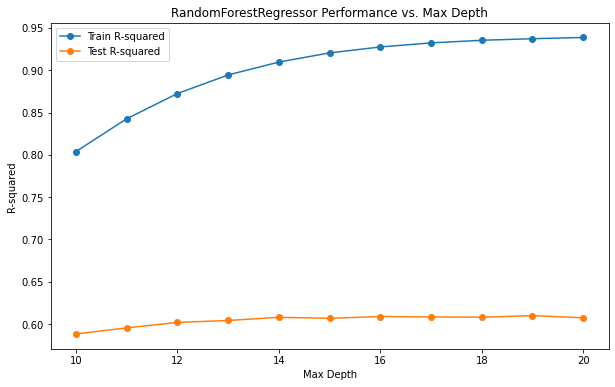

In [25]:
max_depth_values = np.arange(10, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq = r2_score(y_train, rf_regressor.predict(X_train))
    train_rsq_values.append(train_rsq)
    
    # Calculate R-squared values for testing set
    test_rsq = r2_score(y_test, rf_regressor.predict(X_test))
    test_rsq_values.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(max_depth_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

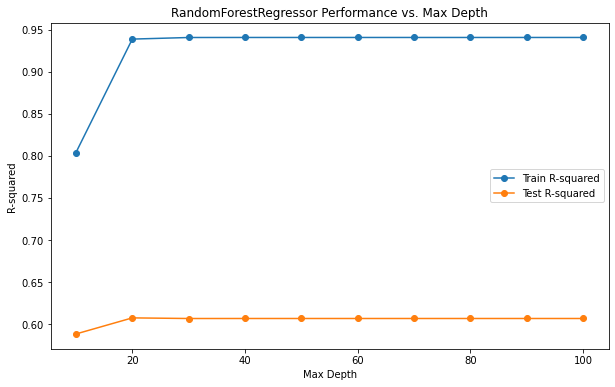

In [26]:
max_depth_values = np.arange(10, 110,10)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq = r2_score(y_train, rf_regressor.predict(X_train))
    train_rsq_values.append(train_rsq)
    
    # Calculate R-squared values for testing set
    test_rsq = r2_score(y_test, rf_regressor.predict(X_test))
    test_rsq_values.append(test_rsq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(max_depth_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# plateaus at around here

### 2.3.1.1 (c) min_samples_split
- can help to reduce overfitting 


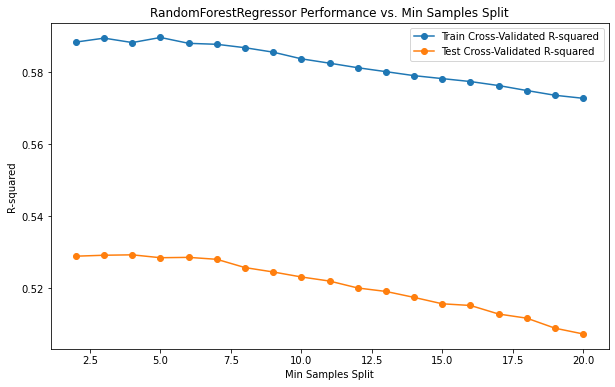

In [27]:
min_samples_split_values = np.arange(2, 21)

# Lists to store cross-validated R-squared values for both training and testing
train_cross_val_rsq_values = []
test_cross_val_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Calculate cross-validated R-squared values for training set
    train_cross_val_rsq = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')
    
    # Calculate cross-validated R-squared values for testing set
    test_cross_val_rsq = cross_val_score(rf_regressor, X_test, y_test, cv=5, scoring='r2')
    
    # Store the mean of cross-validated R-squared values for both training and testing sets
    train_cross_val_rsq_values.append(np.mean(train_cross_val_rsq))
    test_cross_val_rsq_values.append(np.mean(test_cross_val_rsq))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_cross_val_rsq_values, label='Train Cross-Validated R-squared', marker='o')
plt.plot(min_samples_split_values, test_cross_val_rsq_values, label='Test Cross-Validated R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

###### min samples vs rsq (range: 2-21)

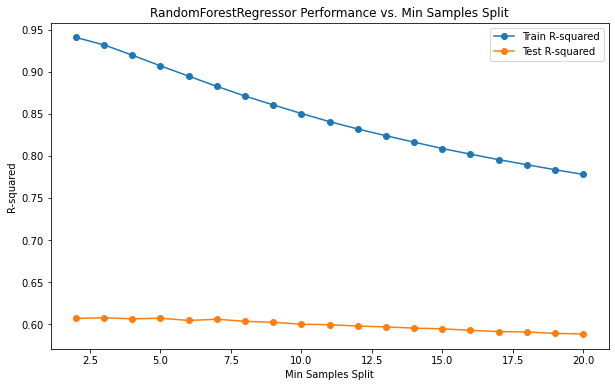

In [28]:
min_samples_split_values = np.arange(2, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_split_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# more splits help to reduce overfitting

##### min sample vs rsq (range: 10-100)

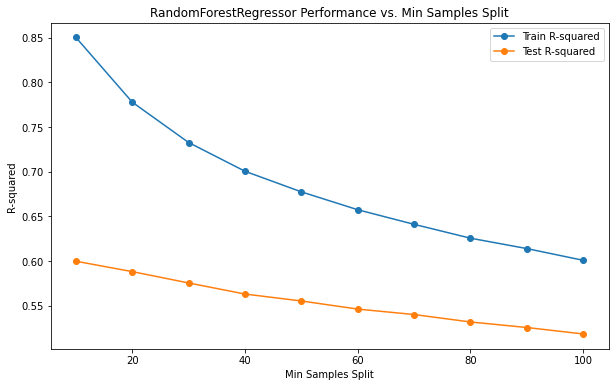

In [29]:
min_samples_split_values = np.arange(10, 110,10)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_split_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# more splits help to reduce overfitting

### 2.3.1.1 (d) min_samples_leaf

##### min_samples_leaf vs. train and test

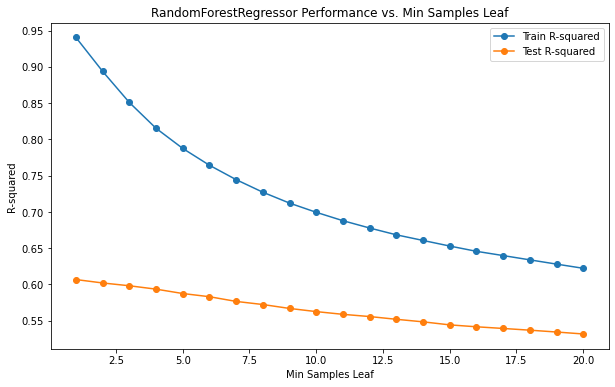

In [30]:
min_samples_leaf_values = np.arange(1, 21)

# Lists to store R-squared values for both training and testing
train_rsq_values = []
test_rsq_values = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    # Create the RandomForestRegressor
    rf_regressor = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    
    # Fit the model on training data
    rf_regressor.fit(X_train, y_train)
    
    # Calculate R-squared values for training set
    train_rsq_values.append(rf_regressor.score(X_train, y_train))
    
    # Calculate R-squared values for testing set
    test_rsq_values.append(rf_regressor.score(X_test, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_rsq_values, label='Train R-squared', marker='o')
plt.plot(min_samples_leaf_values, test_rsq_values, label='Test R-squared', marker='o')
plt.title('RandomForestRegressor Performance vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('R-squared')
plt.legend()
plt.show()

# leaf samples help to reduce overfitting but might reduce the scores

### 2.3.1.2 Hyperparameter Optimization 

##### 1st iteration - lower number of estimators 

In [31]:
param_grid = {'n_estimators' : [40,50,60], # this is where the model tends to be at its best, and at lower number of trees 
              'max_depth' : [10,20,30], # where the model tends to be the best at lower depths
              'min_samples_split':[10,20,30],
              'min_samples_leaf':[10,15,20]} # higher leaves lead to closer scores

In [32]:
start_time = time.time()

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.524 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.557 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.563 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.538 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.570 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.523 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.559 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.567 total

[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.558 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.510 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.549 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.549 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.526 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.556 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.512 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.548 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=15, 

[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.540 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=40;, score=0.572 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.524 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.560 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.571 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.538 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.575 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.525 total time=   0.3s
[CV 2/5] END max_depth=20, min_samples_leaf=10, 

[CV 3/5] END max_depth=20, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.551 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.528 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.557 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.511 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.548 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.550 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.530 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.557 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=15, 

[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.560 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.571 total time=   0.2s
[CV 4/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.538 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.575 total time=   0.3s
[CV 1/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.525 total time=   0.3s
[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.561 total time=   0.3s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.570 total time=   0.3s
[CV 4/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.540 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=10, 

[CV 1/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.511 total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.548 total time=   0.1s
[CV 3/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.550 total time=   0.1s
[CV 4/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.530 total time=   0.1s
[CV 5/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=40;, score=0.557 total time=   0.1s
[CV 1/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=50;, score=0.511 total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=50;, score=0.549 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=50;, score=0.552 total time=   0.2s
[CV 4/5] END max_depth=30, min_samples_leaf=15, 

In [33]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.5538060730324632
{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 60}
Elapsed Time: 02:04


Model : RandomForestRegressor(max_depth=30, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=50, random_state=42):

R-Square:
0.698090607267523 (Train R^2 Value)
0.5634109241040984 (Test R^2 Value)

RMSE:
53.60508956518299 (Train RMSE)
66.85216384249075 (Test RMSE)


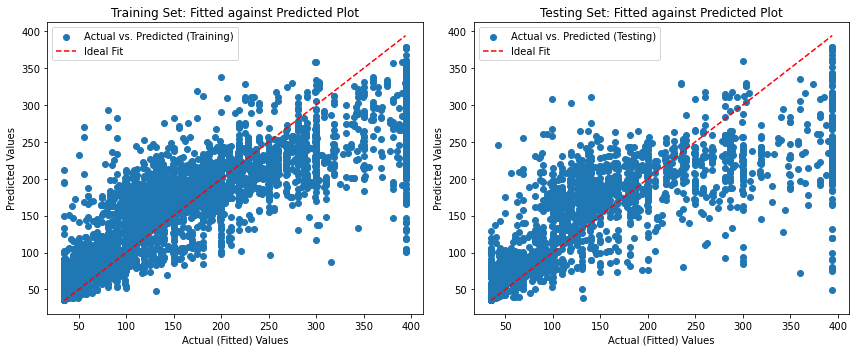

In [34]:
rfr2 = RandomForestRegressor(max_depth=30,min_samples_leaf=10
                             ,min_samples_split=10
                             ,n_estimators=50
                             ,random_state=42).fit(X_train,y_train)

model_scores_regression(rfr2)

# overfitting reduced, but the test score slightly decreased

##### 2nd iteration -  higher values 
- use higher number of estimators for the model to understand patterns better

In [35]:
param_grid = {'n_estimators' : [70,80,90], # this is where the model tends to be at its best, and at lower number of trees 
              'max_depth' : [10,20,30], # where the model tends to be the best at lower depths
              'min_samples_split':[10,20,30],
              'min_samples_leaf':[10,15,20]} # higher leaves lead to closer scores

In [36]:
start_time = time.time()

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.522 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.560 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.562 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.538 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.569 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.522 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.560 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.560 total

[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.557 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.510 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.549 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.546 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.524 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.557 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.508 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.550 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=15, 

[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.542 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.572 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.523 total time=   0.5s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.561 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.565 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.572 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.524 total time=   0.5s
[CV 2/5] END max_depth=20, min_samples_leaf=10, 

[CV 3/5] END max_depth=20, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.547 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.527 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=15, min_samples_split=20, n_estimators=90;, score=0.558 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.508 total time=   0.3s
[CV 2/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.550 total time=   0.3s
[CV 3/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.550 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.529 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.557 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=15, 

[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.561 total time=   0.4s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.565 total time=   0.4s
[CV 4/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.4s
[CV 5/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.572 total time=   0.4s
[CV 1/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.524 total time=   0.5s
[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.561 total time=   0.5s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.565 total time=   0.5s
[CV 4/5] END max_depth=30, min_samples_leaf=10, min_samples_split=10, n_estimators=90;, score=0.541 total time=   0.5s
[CV 5/5] END max_depth=30, min_samples_leaf=10, 

[CV 1/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.508 total time=   0.3s
[CV 2/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.550 total time=   0.3s
[CV 3/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.550 total time=   0.3s
[CV 4/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.529 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=70;, score=0.557 total time=   0.3s
[CV 1/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=80;, score=0.508 total time=   0.4s
[CV 2/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=80;, score=0.550 total time=   0.4s
[CV 3/5] END max_depth=30, min_samples_leaf=15, min_samples_split=30, n_estimators=80;, score=0.548 total time=   0.4s
[CV 4/5] END max_depth=30, min_samples_leaf=15, 

In [37]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.5531766996594858
{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 70}
Elapsed Time: 03:14


Model : RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=70, random_state=42):

R-Square:
0.6987725089293495 (Train R^2 Value)
0.5622362772785384 (Test R^2 Value)

RMSE:
53.544518307659644 (Train RMSE)
66.94203660551969 (Test RMSE)


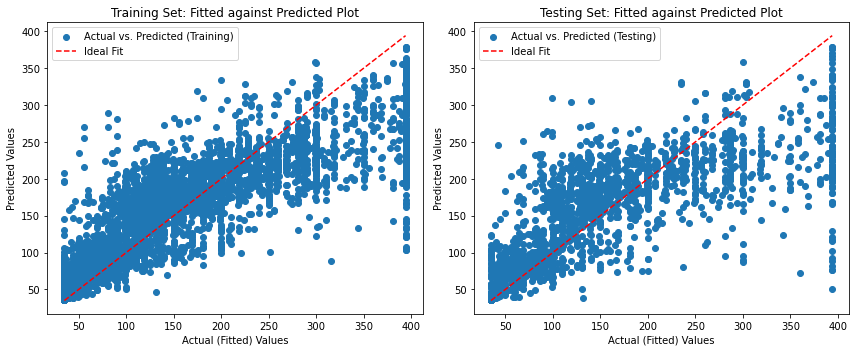

In [38]:
rfr3 = RandomForestRegressor(max_depth=20,min_samples_leaf=10
                             ,min_samples_split=10,n_estimators=70,random_state=42).fit(X_train,y_train)

model_scores_regression(rfr3)

# test scores went down

##### 3rd iteration - wider range of values  
- we try a wider and higher range of values for experimentation

In [39]:
param_grid = {'n_estimators' : [60,70,80,90], # this is where the model tends to be at its best, and at lower number of trees 
              'max_depth' : [10,20,30,40], # where the model tends to be the best at lower depths
              'min_samples_split':[10,20,30,40],
              'min_samples_leaf':[10,20,30,40]}

In [40]:
start_time = time.time()

grid = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.524 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.560 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.565 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.537 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.570 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.522 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.560 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.562 tot

[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=70;, score=0.557 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=80;, score=0.511 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=80;, score=0.550 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=80;, score=0.551 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=80;, score=0.528 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=80;, score=0.557 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.512 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.550 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=10, 

[CV 4/5] END max_depth=10, min_samples_leaf=20, min_samples_split=30, n_estimators=90;, score=0.516 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=20, min_samples_split=30, n_estimators=90;, score=0.547 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40, n_estimators=60;, score=0.498 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40, n_estimators=60;, score=0.541 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40, n_estimators=60;, score=0.542 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40, n_estimators=60;, score=0.517 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40, n_estimators=60;, score=0.548 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=20, min_samples_split=40, n_estimators=70;, score=0.496 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=20, 

[CV 3/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=70;, score=0.534 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=70;, score=0.504 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=70;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.481 total time=   0.3s
[CV 2/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.526 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.532 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.504 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=30, 

[CV 2/5] END max_depth=10, min_samples_leaf=40, min_samples_split=20, n_estimators=90;, score=0.515 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=40, min_samples_split=20, n_estimators=90;, score=0.519 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=40, min_samples_split=20, n_estimators=90;, score=0.491 total time=   0.3s
[CV 5/5] END max_depth=10, min_samples_leaf=40, min_samples_split=20, n_estimators=90;, score=0.522 total time=   0.3s
[CV 1/5] END max_depth=10, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.471 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.515 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.522 total time=   0.2s
[CV 4/5] END max_depth=10, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.492 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=40, 

[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=70;, score=0.523 total time=   0.3s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=70;, score=0.561 total time=   0.3s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=70;, score=0.567 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=70;, score=0.542 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=70;, score=0.572 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.523 total time=   0.4s
[CV 2/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.561 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.565 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=10, 

[CV 5/5] END max_depth=20, min_samples_leaf=20, min_samples_split=10, n_estimators=80;, score=0.548 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=20, min_samples_split=10, n_estimators=90;, score=0.497 total time=   0.4s
[CV 2/5] END max_depth=20, min_samples_leaf=20, min_samples_split=10, n_estimators=90;, score=0.542 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=20, min_samples_split=10, n_estimators=90;, score=0.541 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=20, min_samples_split=10, n_estimators=90;, score=0.516 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=20, min_samples_split=10, n_estimators=90;, score=0.548 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=60;, score=0.498 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=20, min_samples_split=20, n_estimators=60;, score=0.541 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=20, 

[CV 4/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=60;, score=0.504 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=60;, score=0.535 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=70;, score=0.480 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=70;, score=0.526 total time=   0.3s
[CV 3/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=70;, score=0.534 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=70;, score=0.504 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=70;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=30, min_samples_split=10, n_estimators=80;, score=0.481 total time=   0.4s
[CV 2/5] END max_depth=20, min_samples_leaf=30, 

[CV 3/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=80;, score=0.532 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=80;, score=0.504 total time=   0.3s
[CV 5/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=80;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=90;, score=0.481 total time=   0.4s
[CV 2/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=90;, score=0.526 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=90;, score=0.532 total time=   0.3s
[CV 4/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=90;, score=0.503 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=30, min_samples_split=40, n_estimators=90;, score=0.534 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=40, 

[CV 2/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=60;, score=0.515 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=60;, score=0.522 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=60;, score=0.492 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=60;, score=0.522 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=70;, score=0.470 total time=   0.2s
[CV 2/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=70;, score=0.515 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=70;, score=0.521 total time=   0.2s
[CV 4/5] END max_depth=20, min_samples_leaf=40, min_samples_split=40, n_estimators=70;, score=0.493 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=40, 

[CV 1/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.518 total time=   0.4s
[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.555 total time=   0.4s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.560 total time=   0.4s
[CV 4/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.536 total time=   0.4s
[CV 5/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=80;, score=0.565 total time=   0.4s
[CV 1/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=90;, score=0.519 total time=   0.5s
[CV 2/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=90;, score=0.555 total time=   0.4s
[CV 3/5] END max_depth=30, min_samples_leaf=10, min_samples_split=30, n_estimators=90;, score=0.560 total time=   0.4s
[CV 4/5] END max_depth=30, min_samples_leaf=10, 

[CV 5/5] END max_depth=30, min_samples_leaf=20, min_samples_split=20, n_estimators=90;, score=0.548 total time=   0.4s
[CV 1/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=60;, score=0.498 total time=   0.3s
[CV 2/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=60;, score=0.541 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=60;, score=0.543 total time=   0.2s
[CV 4/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=60;, score=0.518 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=60;, score=0.549 total time=   0.2s
[CV 1/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=70;, score=0.496 total time=   0.3s
[CV 2/5] END max_depth=30, min_samples_leaf=20, min_samples_split=30, n_estimators=70;, score=0.542 total time=   0.3s
[CV 3/5] END max_depth=30, min_samples_leaf=20, 

[CV 4/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=70;, score=0.504 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=70;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.481 total time=   0.3s
[CV 2/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.526 total time=   0.3s
[CV 3/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.532 total time=   0.3s
[CV 4/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.504 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=80;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=30, min_samples_leaf=30, min_samples_split=20, n_estimators=90;, score=0.481 total time=   0.4s
[CV 2/5] END max_depth=30, min_samples_leaf=30, 

[CV 3/5] END max_depth=30, min_samples_leaf=40, min_samples_split=10, n_estimators=90;, score=0.520 total time=   0.3s
[CV 4/5] END max_depth=30, min_samples_leaf=40, min_samples_split=10, n_estimators=90;, score=0.491 total time=   0.3s
[CV 5/5] END max_depth=30, min_samples_leaf=40, min_samples_split=10, n_estimators=90;, score=0.523 total time=   0.3s
[CV 1/5] END max_depth=30, min_samples_leaf=40, min_samples_split=20, n_estimators=60;, score=0.471 total time=   0.2s
[CV 2/5] END max_depth=30, min_samples_leaf=40, min_samples_split=20, n_estimators=60;, score=0.515 total time=   0.2s
[CV 3/5] END max_depth=30, min_samples_leaf=40, min_samples_split=20, n_estimators=60;, score=0.522 total time=   0.2s
[CV 4/5] END max_depth=30, min_samples_leaf=40, min_samples_split=20, n_estimators=60;, score=0.492 total time=   0.2s
[CV 5/5] END max_depth=30, min_samples_leaf=40, min_samples_split=20, n_estimators=60;, score=0.522 total time=   0.2s
[CV 1/5] END max_depth=30, min_samples_leaf=40, 

[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.561 total time=   0.3s
[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.567 total time=   0.3s
[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.542 total time=   0.3s
[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=70;, score=0.572 total time=   0.3s
[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.523 total time=   0.4s
[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.561 total time=   0.4s
[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.565 total time=   0.4s
[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.542 total time=   0.4s
[CV 5/5] END max_depth=40, min_samples_leaf=10, 

[CV 1/5] END max_depth=40, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.512 total time=   0.4s
[CV 2/5] END max_depth=40, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.551 total time=   0.4s
[CV 3/5] END max_depth=40, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.554 total time=   0.4s
[CV 4/5] END max_depth=40, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.529 total time=   0.4s
[CV 5/5] END max_depth=40, min_samples_leaf=10, min_samples_split=40, n_estimators=90;, score=0.559 total time=   0.4s
[CV 1/5] END max_depth=40, min_samples_leaf=20, min_samples_split=10, n_estimators=60;, score=0.498 total time=   0.2s
[CV 2/5] END max_depth=40, min_samples_leaf=20, min_samples_split=10, n_estimators=60;, score=0.541 total time=   0.2s
[CV 3/5] END max_depth=40, min_samples_leaf=20, min_samples_split=10, n_estimators=60;, score=0.543 total time=   0.2s
[CV 4/5] END max_depth=40, min_samples_leaf=20, 

[CV 5/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=60;, score=0.549 total time=   0.2s
[CV 1/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=70;, score=0.496 total time=   0.3s
[CV 2/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=70;, score=0.542 total time=   0.3s
[CV 3/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=70;, score=0.543 total time=   0.3s
[CV 4/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=70;, score=0.518 total time=   0.3s
[CV 5/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=70;, score=0.548 total time=   0.3s
[CV 1/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=80;, score=0.497 total time=   0.3s
[CV 2/5] END max_depth=40, min_samples_leaf=20, min_samples_split=40, n_estimators=80;, score=0.541 total time=   0.3s
[CV 3/5] END max_depth=40, min_samples_leaf=20, 

[CV 4/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.504 total time=   0.3s
[CV 5/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=80;, score=0.534 total time=   0.3s
[CV 1/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=90;, score=0.481 total time=   0.4s
[CV 2/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=90;, score=0.526 total time=   0.4s
[CV 3/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=90;, score=0.532 total time=   0.4s
[CV 4/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=90;, score=0.503 total time=   0.4s
[CV 5/5] END max_depth=40, min_samples_leaf=30, min_samples_split=30, n_estimators=90;, score=0.534 total time=   0.4s
[CV 1/5] END max_depth=40, min_samples_leaf=30, min_samples_split=40, n_estimators=60;, score=0.482 total time=   0.2s
[CV 2/5] END max_depth=40, min_samples_leaf=30, 

[CV 3/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.522 total time=   0.3s
[CV 4/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.492 total time=   0.3s
[CV 5/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=60;, score=0.522 total time=   0.3s
[CV 1/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=70;, score=0.470 total time=   0.3s
[CV 2/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=70;, score=0.515 total time=   0.2s
[CV 3/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=70;, score=0.521 total time=   0.3s
[CV 4/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=70;, score=0.493 total time=   0.3s
[CV 5/5] END max_depth=40, min_samples_leaf=40, min_samples_split=30, n_estimators=70;, score=0.522 total time=   0.3s
[CV 1/5] END max_depth=40, min_samples_leaf=40, 

In [41]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.5538060730324632
{'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 60}
Elapsed Time: 08:49


Model : RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=60, random_state=42):

R-Square:
0.6982662534321809 (Train R^2 Value)
0.5624134815937862 (Test R^2 Value)

RMSE:
53.589493995013186 (Train RMSE)
66.9284863524432 (Test RMSE)


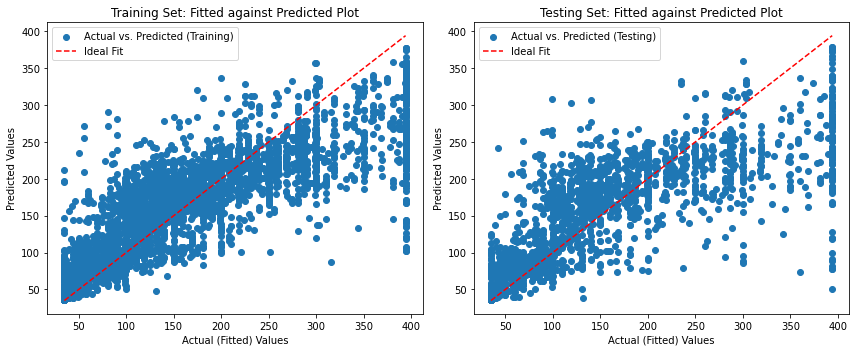

In [42]:
rfr4 =  RandomForestRegressor(max_depth=20
                               ,min_samples_leaf=10
                               ,min_samples_split=10
                               ,n_estimators=60
                               ,random_state=42).fit(X_train,y_train)

model_scores_regression(rfr4)

# around the same scores as previous models

##### 4th iteration 
- use higher samples split to reduce overfitting 
- use higher leaf split as well

### 2.3.2 Model 2 (XG Boost)

Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...):

R-Square:
0.92200820277793 (Train R^2 Value)
0.6006757104523945 (Test R^2 Value)

RMSE:
27.245336604002006 (Train RMSE)
63.9354756257373 (Test RMSE)


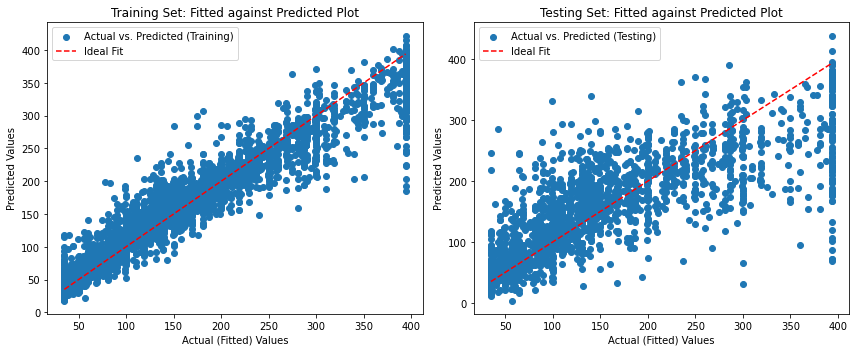

In [43]:
model_scores_regression(xgb_r)

### 2.3.2.1 Hyperparameter Inspection

- <mark>booster</mark> : type of booster, 2 types, tree booster and linear booster 
- <mark>n_estimators</mark> : number of trees 
- <mark>max_depth</mark> : depth of tree

##### Tree Booster Params :  (according to docs) 
- <mark>eta</mark> : aka learning rate, range of 0,1 
- <mark>gamma</mark> : minimum loss reduction required to make a further partition 
- <mark>subsample</mark> : subsample ratio of training instances 
- <mark>lambda</mark> : L2 regularization term on weights, range has no limit from 0
- <mark>alpha</mark> : L1 regularization term, range has no limit from 0 

reference : https://xgboost.readthedocs.io/en/stable/parameter.html

### 2.3.2.1 (a) n_estimators

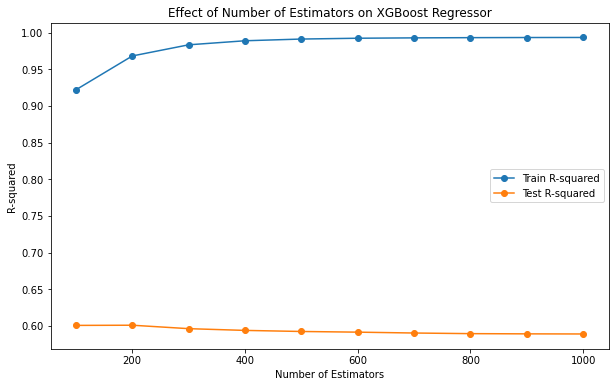

In [44]:
n_estimators_values = np.arange(100,1100,100)

train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    # Create an XGBoost Regressor with the current number of estimators
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('Effect of Number of Estimators on XGBoost Regressor')
plt.legend()
plt.show()

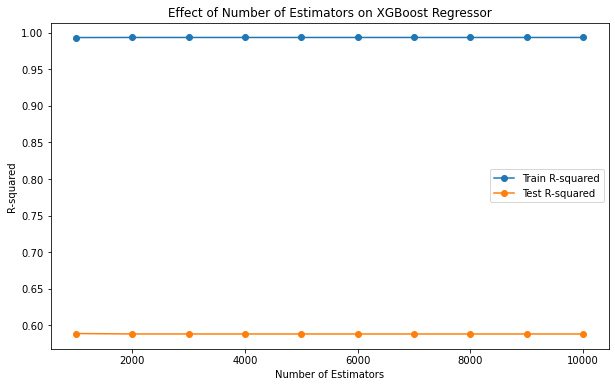

In [45]:
n_estimators_values = np.arange(1000,11000,1000)

train_scores = []
test_scores = []

for n_estimators in n_estimators_values:
    # Create an XGBoost Regressor with the current number of estimators
    xgb_model = XGBRegressor(n_estimators=n_estimators, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Train R-squared', marker='o')
plt.plot(n_estimators_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared')
plt.title('Effect of Number of Estimators on XGBoost Regressor')
plt.legend()
plt.show()

# it plateaus as it goes higher, as expected. 

### 2.3.2.2 (b) eta

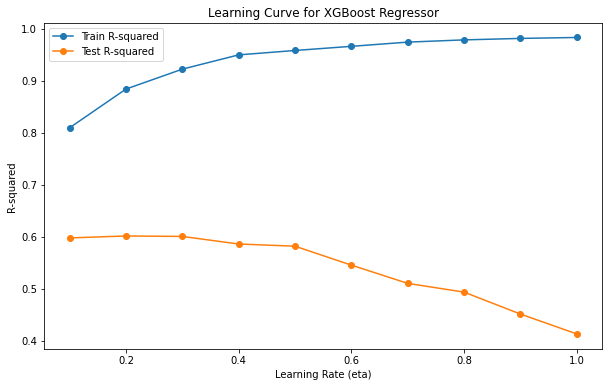

In [46]:
etas = np.arange(0.1, 1.1, 0.1)

train_scores = []
test_scores = []

for eta in etas:
    # Create an XGBoost Regressor with the current learning rate
    xgb_model = XGBRegressor(learning_rate=eta, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(etas, train_scores, label='Train R-squared', marker='o')
plt.plot(etas, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Learning Rate (eta)')
plt.ylabel('R-squared')
plt.title('Learning Curve for XGBoost Regressor')
plt.legend()
plt.show()

# higher learning rates make the model complicated?/ pay more attention to the train set

### 2.3.1.2 (c) gamma

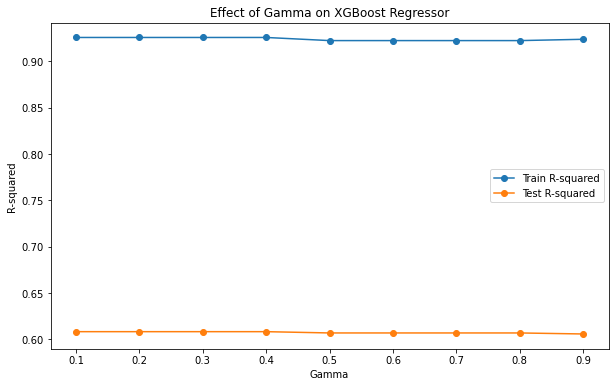

In [47]:
gamma_values = np.arange(0.1,1,0.1)

train_scores = []
test_scores = []

for gamma in gamma_values:
    # Create an XGBoost Regressor with the current gamma value
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared', marker='o')
plt.plot(gamma_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Effect of Gamma on XGBoost Regressor')
plt.legend()
plt.show()

# gamma has no effect? 

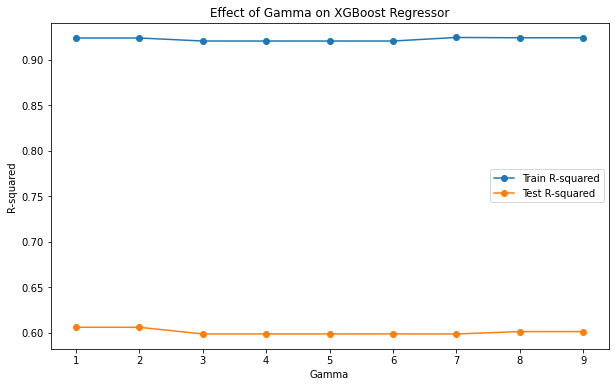

In [48]:
gamma_values = np.arange(1,10,1)

train_scores = []
test_scores = []

for gamma in gamma_values:
    # Create an XGBoost Regressor with the current gamma value
    xgb_model = XGBRegressor(gamma=gamma, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, label='Train R-squared', marker='o')
plt.plot(gamma_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Gamma')
plt.ylabel('R-squared')
plt.title('Effect of Gamma on XGBoost Regressor')
plt.legend()
plt.show()


### 2.3.1.2 (d) subsample

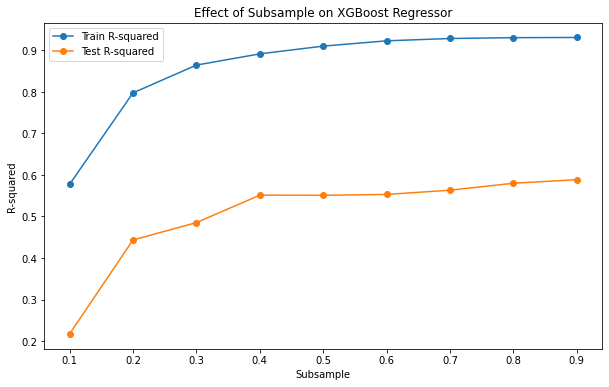

In [49]:
subsample_values = np.arange(0.1,1,0.1)

train_scores = []
test_scores = []

for subsample in subsample_values:
    # Create an XGBoost Regressor with the current subsample value
    xgb_model = XGBRegressor(subsample=subsample, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(subsample_values, train_scores, label='Train R-squared', marker='o')
plt.plot(subsample_values, test_scores, label='Test R-squared', marker='o')
plt.xlabel('Subsample')
plt.ylabel('R-squared')
plt.title('Effect of Subsample on XGBoost Regressor')
plt.legend()
plt.show()

### 2.3.1.2 (e) lambda

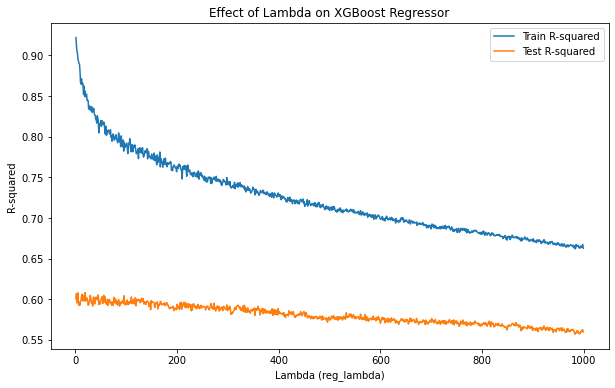

In [50]:
# Define a range of lambda (reg_lambda) values to explore
lambda_values = np.arange(1,1000,1)

train_scores = []
test_scores = []

for reg_lambda in lambda_values:
    # Create an XGBoost Regressor with the current reg_lambda value
    xgb_model = XGBRegressor(reg_lambda=reg_lambda, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_scores, label='Train R-squared')
plt.plot(lambda_values, test_scores, label='Test R-squared')
plt.xlabel('Lambda (reg_lambda)')
plt.ylabel('R-squared')
plt.title('Effect of Lambda on XGBoost Regressor')
plt.legend()
plt.show()

# regularisation helps to reduce overfitting, higher reduces it more

### 2.3.1.2 (f) alpha 

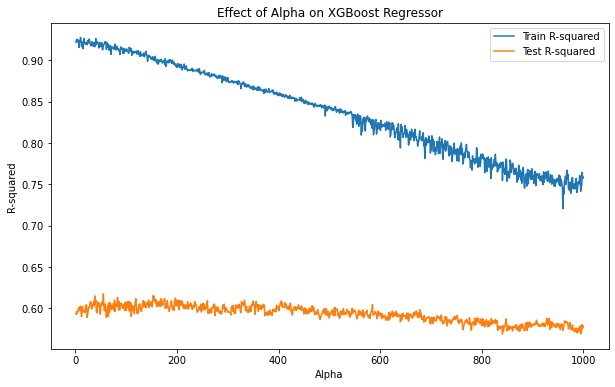

In [51]:
alpha_values = np.arange(1, 1001, 1)

train_scores = []
test_scores = []

for alpha in alpha_values:
    # Create an XGBoost Regressor with the current alpha value
    xgb_model = XGBRegressor(alpha=alpha, random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = xgb_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores.append(train_r2)

    # Predict on the test set
    y_test_pred = xgb_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores.append(test_r2)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores, label='Train R-squared')
plt.plot(alpha_values, test_scores, label='Test R-squared')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('Effect of Alpha on XGBoost Regressor')
plt.legend()
plt.show()

### 2.3.1.2 (g) max_depth

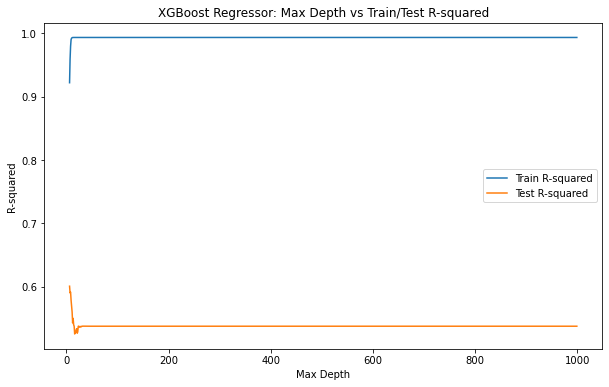

In [52]:
max_depths = np.arange(6, 1000, 1)

# Initialize empty lists to store train and test scores
train_scores = []
test_scores = []

# Iterate over different max depths
for depth in max_depths:
    # Create and fit the XGBoost Regressor
    model = XGBRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R-squared and append to the lists
    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train R-squared')
plt.plot(max_depths, test_scores, label='Test R-squared')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('XGBoost Regressor: Max Depth vs Train/Test R-squared')
plt.legend()
plt.show()

### 2.3.1.3 Hyperparameter Optimization

### 2.3.1.3 (a) GridSearchCV

##### 1st iteration
- lower estimators 
- add regularization params later on

In [53]:
param_grid = {'max_depth' : [10,20,30,50],
              'n_estimators' : [100,400,700],
              'eta' : [0.1,0.4,0.7,1], # 0-1
              'subsample' : [0.1,0.4,0.7,1]} #0-1

In [54]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.478 total time=   0.0s
[CV 2/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.512 total time=   0.0s
[CV 3/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.484 total time=   0.0s
[CV 4/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.475 total time=   0.0s
[CV 5/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.1;, score=0.548 total time=   0.0s
[CV 1/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.524 total time=   0.1s
[CV 2/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.574 total time=   0.1s
[CV 3/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.582 total time=   0.1s
[CV 4/5] END eta=0.1, max_depth=10, n_estimators=100, subsample=0.4;, score=0.540 total time=   0.1s
[CV 5/5] END eta=0.1, max_de

[CV 2/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.472 total time=   1.1s
[CV 3/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.466 total time=   1.1s
[CV 4/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.425 total time=   1.1s
[CV 5/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.1;, score=0.489 total time=   1.1s
[CV 1/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.508 total time=   2.8s
[CV 2/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.560 total time=   2.8s
[CV 3/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.561 total time=   2.9s
[CV 4/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.513 total time=   2.7s
[CV 5/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.4;, score=0.572 total time=   2.6s
[CV 1/5] END eta=0.1, max_depth=20, n_estimators=400, subsample=0.7;, score=0.526 total tim

[CV 4/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.1;, score=0.428 total time=   2.1s
[CV 5/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.1;, score=0.480 total time=   1.9s
[CV 1/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.501 total time=   5.3s
[CV 2/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.550 total time=   5.3s
[CV 3/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.567 total time=   5.4s
[CV 4/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.522 total time=   5.4s
[CV 5/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.4;, score=0.586 total time=   5.3s
[CV 1/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.7;, score=0.530 total time=   7.5s
[CV 2/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.7;, score=0.580 total time=   7.6s
[CV 3/5] END eta=0.1, max_depth=30, n_estimators=700, subsample=0.7;, score=0.573 total tim

[CV 1/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.344 total time=   0.2s
[CV 2/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.377 total time=   0.2s
[CV 3/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.401 total time=   0.2s
[CV 4/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.378 total time=   0.2s
[CV 5/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.4;, score=0.385 total time=   0.2s
[CV 1/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.433 total time=   0.2s
[CV 2/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.506 total time=   0.2s
[CV 3/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.494 total time=   0.2s
[CV 4/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.457 total time=   0.2s
[CV 5/5] END eta=0.4, max_depth=10, n_estimators=100, subsample=0.7;, score=0.535 total tim

[CV 3/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.4;, score=0.370 total time=   2.3s
[CV 4/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.4;, score=0.347 total time=   2.4s
[CV 5/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.4;, score=0.370 total time=   2.3s
[CV 1/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.444 total time=   3.0s
[CV 2/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.471 total time=   3.1s
[CV 3/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.479 total time=   3.1s
[CV 4/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.451 total time=   3.9s
[CV 5/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=0.7;, score=0.530 total time=   3.3s
[CV 1/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=1;, score=0.460 total time=   0.6s
[CV 2/5] END eta=0.4, max_depth=20, n_estimators=400, subsample=1;, score=0.507 total time=  

[CV 4/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.4;, score=0.289 total time=   5.8s
[CV 5/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.4;, score=0.306 total time=   5.9s
[CV 1/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.396 total time=   7.6s
[CV 2/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.459 total time=   7.7s
[CV 3/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.451 total time=   7.4s
[CV 4/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.455 total time=   7.5s
[CV 5/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=0.7;, score=0.543 total time=   7.8s
[CV 1/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=1;, score=0.463 total time=   0.9s
[CV 2/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=1;, score=0.508 total time=   0.9s
[CV 3/5] END eta=0.4, max_depth=30, n_estimators=700, subsample=1;, score=0.514 total time=   0

[CV 5/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.4;, score=-0.017 total time=   0.3s
[CV 1/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.291 total time=   0.3s
[CV 2/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.413 total time=   0.3s
[CV 3/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.368 total time=   0.2s
[CV 4/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.289 total time=   0.3s
[CV 5/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=0.7;, score=0.416 total time=   0.3s
[CV 1/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.445 total time=   0.2s
[CV 2/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.494 total time=   0.2s
[CV 3/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.467 total time=   0.2s
[CV 4/5] END eta=0.7, max_depth=10, n_estimators=100, subsample=1;, score=0.457 total time=   0.

[CV 4/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.4;, score=-0.237 total time=   2.3s
[CV 5/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.4;, score=-0.030 total time=   2.3s
[CV 1/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.324 total time=   2.9s
[CV 2/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.352 total time=   3.0s
[CV 3/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.383 total time=   3.0s
[CV 4/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.280 total time=   2.9s
[CV 5/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=0.7;, score=0.399 total time=   3.2s
[CV 1/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=1;, score=0.401 total time=   0.4s
[CV 2/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=1;, score=0.454 total time=   0.4s
[CV 3/5] END eta=0.7, max_depth=20, n_estimators=400, subsample=1;, score=0.466 total time=  

[CV 2/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.264 total time=   5.6s
[CV 3/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.287 total time=   5.8s
[CV 4/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.150 total time=   5.7s
[CV 5/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.4;, score=-0.214 total time=   6.1s
[CV 1/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.292 total time=   6.3s
[CV 2/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.300 total time=   6.9s
[CV 3/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.259 total time=   6.7s
[CV 4/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.279 total time=   7.1s
[CV 5/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=0.7;, score=0.342 total time=   7.6s
[CV 1/5] END eta=0.7, max_depth=30, n_estimators=700, subsample=1;, score=0.393 total t

[CV 1/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-2.325 total time=   0.2s
[CV 2/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.316 total time=   0.3s
[CV 3/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.249 total time=   0.3s
[CV 4/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-2.535 total time=   0.2s
[CV 5/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.4;, score=-3.317 total time=   0.2s
[CV 1/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.014 total time=   0.4s
[CV 2/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.167 total time=   0.3s
[CV 3/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.048 total time=   0.2s
[CV 4/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.135 total time=   0.2s
[CV 5/5] END eta=1, max_depth=10, n_estimators=100, subsample=0.7;, score=0.116 total time=   0.2s
[CV 1

[CV 4/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.1;, score=-2777703328287281454329410399240192.000 total time=   1.3s
[CV 5/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.1;, score=-2308750475549537459424942306099200.000 total time=   0.9s
[CV 1/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-1.831 total time=   2.7s
[CV 2/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.125 total time=   3.5s
[CV 3/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.146 total time=   2.4s
[CV 4/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-2.469 total time=   2.7s
[CV 5/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.4;, score=-1.861 total time=   3.3s
[CV 1/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.7;, score=-0.035 total time=   3.7s
[CV 2/5] END eta=1, max_depth=20, n_estimators=400, subsample=0.7;, score=0.159 total time=   3.5s
[CV 3/5] END eta=1, max_depth=20, n

[CV 2/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-9437448852323588350529841242570752.000 total time=   1.1s
[CV 3/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-15222682203945322194482932802912256.000 total time=   1.1s
[CV 4/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-19584109977233360744423603528794112.000 total time=   1.1s
[CV 5/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.1;, score=-16335731070535996521229492594671616.000 total time=   1.1s
[CV 1/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-2.538 total time=   5.6s
[CV 2/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-2.879 total time=   5.9s
[CV 3/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-3.034 total time=   5.3s
[CV 4/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4;, score=-2.470 total time=   5.3s
[CV 5/5] END eta=1, max_depth=30, n_estimators=700, subsample=0.4

[CV 5/5] END eta=1, max_depth=50, n_estimators=700, subsample=1;, score=0.487 total time=   0.4s


In [55]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.584830934158338
{'eta': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}
Elapsed Time: 31:29


Model : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...):

R-Square:
0.9738270439508139 (Train R^2 Value)
0.6071745231448404 (Test R^2 Value)

RMSE:
15.783165177575858 (Train RMSE)
63.413081766294376 (Test RMSE)


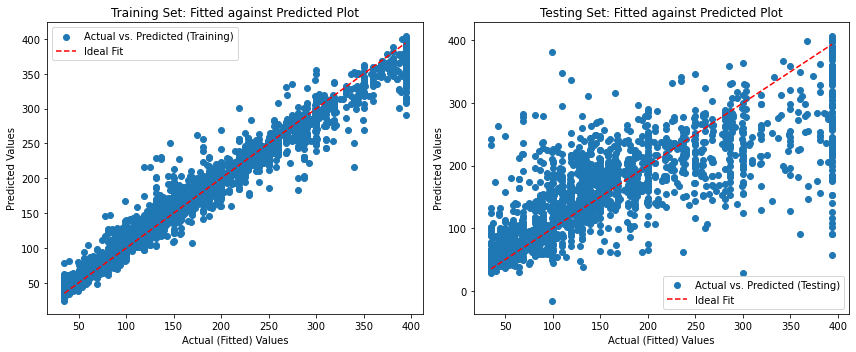

In [56]:
xgb_r2 = XGBRegressor(eta=0.1,n_estimators=100, subsample=0.7,max_depth=10,random_state=42).fit(X_train,y_train)

model_scores_regression(xgb_r2)

# more overfitted, and train scores increase

##### 2nd iteration - added regularization parameters
- to reduce overfitting, we try to add regularisation 
- add booster type? 
- l1 and l2 can be used concurrently? 

In [24]:
param_grid = {'n_estimators' : [50,100,200], # use a lower range 
              'eta' : [0.1,0.7,1], # 0-1
              'subsample' : [0.1,0.7,1],
              'lambda' : [600,800,1000],
              'alpha' : [600,800,1000]} # these are the ranges for l2 and l1 where there is less overfitting 

In [25]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.164 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.109 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.149 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.094 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.1;, score=0.108 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.7;, score=0.415 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.7;, score=0.415 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, subsample=0.7;, score=0.424 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.1, lambda=600, n_estimators=50, su

[CV 1/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.382 total time=   0.1s
[CV 2/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.384 total time=   0.1s
[CV 3/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.399 total time=   0.1s
[CV 4/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.364 total time=   0.1s
[CV 5/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.1;, score=0.400 total time=   0.1s
[CV 1/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.505 total time=   0.2s
[CV 2/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.529 total time=   0.2s
[CV 3/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.538 total time=   0.2s
[CV 4/5] END alpha=600, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.497 total time=   0.2s
[CV 5/5] E

[CV 1/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.468 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.491 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.490 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.457 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.1;, score=0.519 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.544 total time=   0.1s
[CV 2/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.573 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.592 total time=   0.1s
[CV 4/5] END alpha=600, eta=0.7, lambda=600, n_estimators=100, subsample=0.7;, score=0.537 total time=   0.0s
[CV 5/5] E

[CV 5/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.1;, score=0.440 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.515 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.542 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.550 total time=   0.0s
[CV 4/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.511 total time=   0.0s
[CV 5/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.570 total time=   0.0s
[CV 1/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.532 total time=   0.0s
[CV 2/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.566 total time=   0.0s
[CV 3/5] END alpha=600, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.565 total time=   0.0s
[CV 4/5] END alp

[CV 1/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.525 total time=   0.2s
[CV 2/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.584 total time=   0.2s
[CV 3/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.606 total time=   0.2s
[CV 4/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.538 total time=   0.2s
[CV 5/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=0.7;, score=0.601 total time=   0.2s
[CV 1/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=1;, score=0.529 total time=   0.1s
[CV 2/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=1;, score=0.601 total time=   0.1s
[CV 3/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=1;, score=0.609 total time=   0.1s
[CV 4/5] END alpha=600, eta=1, lambda=600, n_estimators=200, subsample=1;, score=0.544 total time=   0.1s
[CV 5/5] END alpha=600, eta=1, lambd

[CV 4/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.536 total time=   0.1s
[CV 5/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.546 total time=   0.0s
[CV 2/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.594 total time=   0.0s
[CV 3/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.601 total time=   0.0s
[CV 4/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.541 total time=   0.0s
[CV 5/5] END alpha=600, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.607 total time=   0.0s
[CV 1/5] END alpha=600, eta=1, lambda=1000, n_estimators=200, subsample=0.1;, score=0.497 total time=   0.1s
[CV 2/5] END alpha=600, eta=1, lambda=1000, n_estimators=200, subsample=0.1;, score=0.521 total time=   0.1s
[CV 3/5] END alpha=600, eta=1

[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=0.7;, score=0.412 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.423 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.418 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.432 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.398 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=50, subsample=1;, score=0.440 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=100, subsample=0.1;, score=0.305 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=100, subsample=0.1;, score=0.273 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=100, subsample=0.1;, score=0.299 total time=   0.0s
[CV 4/5] END alpha=800, et

[CV 5/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=0.7;, score=0.541 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.508 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.535 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.542 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.505 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.1, lambda=1000, n_estimators=200, subsample=1;, score=0.552 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.7, lambda=600, n_estimators=50, subsample=0.1;, score=0.427 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.7, lambda=600, n_estimators=50, subsample=0.1;, score=0.443 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.7, lambda=600, n_estimators=50, subsample=0.1;, score=0.445 total time=   0.0s
[CV 4/5] END alph

[CV 2/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.590 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.598 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.544 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.7, lambda=800, n_estimators=100, subsample=1;, score=0.599 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.487 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.504 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.518 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.458 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.7, lambda=800, n_estimators=200, subsample=0.1;, score=0.536 total time=   0.1s
[CV 1/5] END alpha

[CV 5/5] END alpha=800, eta=1, lambda=600, n_estimators=50, subsample=1;, score=0.588 total time=   0.0s
[CV 1/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.470 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.485 total time=   0.0s
[CV 3/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.489 total time=   0.0s
[CV 4/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.455 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.1;, score=0.520 total time=   0.0s
[CV 1/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.7;, score=0.523 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.7;, score=0.576 total time=   0.1s
[CV 3/5] END alpha=800, eta=1, lambda=600, n_estimators=100, subsample=0.7;, score=0.588 total time=   0.0s
[CV 4/5] END alpha=800, eta=1, 

[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.7;, score=0.514 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.7;, score=0.552 total time=   0.0s
[CV 3/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.7;, score=0.558 total time=   0.0s
[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.7;, score=0.512 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=0.7;, score=0.569 total time=   0.0s
[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=1;, score=0.527 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=1;, score=0.579 total time=   0.0s
[CV 3/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=1;, score=0.578 total time=   0.0s
[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=50, subsample=1;, score=0.530 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambd

[CV 2/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.7;, score=0.533 total time=   0.2s
[CV 3/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.7;, score=0.541 total time=   0.2s
[CV 4/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.7;, score=0.502 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=0.7;, score=0.556 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=1;, score=0.519 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=1;, score=0.554 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=1;, score=0.557 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=1;, score=0.521 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.1, lambda=600, n_estimators=200, subsample=1;, score=0.566 total time=   0.1s
[CV 1/5] EN

[CV 2/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.460 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.470 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.435 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.483 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=1;, score=0.467 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=1;, score=0.483 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=1;, score=0.495 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=1;, score=0.458 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1000, n_estimators=100, subsample=1;, score=0.506 total time=   0.0s
[C

[CV 4/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.7;, score=0.509 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=0.7;, score=0.566 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=1;, score=0.523 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=1;, score=0.567 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=1;, score=0.567 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=1;, score=0.521 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=50, subsample=1;, score=0.579 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=100, subsample=0.1;, score=0.439 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.7, lambda=800, n_estimators=100, subsample=0.1;, score=0.460 total time=   0.0s
[CV 3/5] END alpha

[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.7;, score=0.533 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=0.7;, score=0.599 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=1;, score=0.547 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=1;, score=0.579 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=1;, score=0.594 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=1;, score=0.541 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=200, subsample=1;, score=0.598 total time=   0.1s
[CV 1/5] END alpha=1000, eta=1, lambda=600, n_estimators=50, subsample=0.1;, score=0.433 total time=   0.0s
[CV 2/5] END alpha=1000, eta=1, lambda=600, n_estimators=50, subsample=0.1;, score=0.460 total time=   0.0s
[CV 3/5] E

[CV 5/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=0.7;, score=0.598 total time=   0.0s
[CV 1/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=1;, score=0.536 total time=   0.0s
[CV 2/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=1;, score=0.585 total time=   0.0s
[CV 3/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=1;, score=0.594 total time=   0.0s
[CV 4/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=1;, score=0.536 total time=   0.0s
[CV 5/5] END alpha=1000, eta=1, lambda=800, n_estimators=100, subsample=1;, score=0.583 total time=   0.0s
[CV 1/5] END alpha=1000, eta=1, lambda=800, n_estimators=200, subsample=0.1;, score=0.488 total time=   0.1s
[CV 2/5] END alpha=1000, eta=1, lambda=800, n_estimators=200, subsample=0.1;, score=0.515 total time=   0.1s
[CV 3/5] END alpha=1000, eta=1, lambda=800, n_estimators=200, subsample=0.1;, score=0.510 total time=   0.1s
[CV 4/5] END alpha=1000, eta=

In [26]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.5861994570545782
{'alpha': 600, 'eta': 0.7, 'lambda': 800, 'n_estimators': 200, 'subsample': 1}
Elapsed Time: 02:43


Model : XGBRegressor(alpha=600, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.7, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...):

R-Square:
0.7875848504744812 (Train R^2 Value)
0.5943520168246361 (Test R^2 Value)

RMSE:
44.96353599790663 (Train RMSE)
64.43972776482747 (Test RMSE)


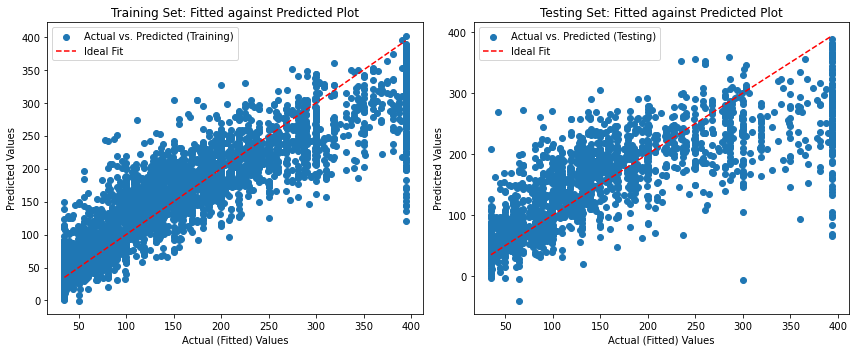

In [33]:
xgb_r3 = XGBRegressor(alpha=600,eta=0.7,reg_lambda=800,n_estimators=200,subsample=1,random_state=42).fit(X_train,y_train)

model_scores_regression(xgb_r3)

# test score slightly decreased

##### 3rd iteration - reduce learning rate
- for better generalisation, we reduce the learning rate 
- use higher values for regularisation params to reduce overfitting

In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'eta': [0.01, 0.05, 0.1, 0.7, 1],
    'subsample': [0.5, 0.7, 1],
    'lambda': [800, 1000, 1200],
    'alpha': [800, 1000, 1200]}

In [35]:
start_time = time.time()

grid = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='r2',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[CV 1/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.160 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.302 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.231 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.264 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.5;, score=-1.301 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.065 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.207 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.136 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.01, lambda=800, n_

[CV 1/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=0.020 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.060 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.014 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.079 total time=   0.1s
[CV 5/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.065 total time=   0.1s
[CV 1/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.113 total time=   0.1s
[CV 2/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.042 total time=   0.1s
[CV 3/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.081 total time=   0.1s
[CV 4/5] END alpha=800, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.016 total t

[CV 1/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.375 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.366 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.378 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.342 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.379 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.399 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.392 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.404 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.371 total time=   0.0s
[

[CV 5/5] END alpha=800, eta=0.05, lambda=1000, n_estimators=200, subsample=1;, score=0.507 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.114 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.048 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.087 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.024 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.041 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.195 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.138 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.171 total time=   0.0s
[C

[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.485 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.506 total time=   0.2s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.514 total time=   0.2s
[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.481 total time=   0.2s
[CV 5/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.531 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.504 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.524 total time=   0.2s
[CV 3/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.535 total time=   0.2s
[CV 4/5] END alpha=800, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.495 total time=   0.2s
[CV 5/5] E

[CV 1/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.416 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.425 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.436 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.408 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.450 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.437 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.451 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.458 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.428 total time=   0.0s
[

[CV 1/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.492 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.520 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.526 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.490 total time=   0.0s
[CV 5/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.552 total time=   0.0s
[CV 1/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.513 total time=   0.0s
[CV 2/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.536 total time=   0.0s
[CV 3/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.552 total time=   0.0s
[CV 4/5] END alpha=800, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.502 total time=   0.0s
[CV 5/5] E

[CV 1/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.536 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.567 total time=   0.2s
[CV 3/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.581 total time=   0.2s
[CV 4/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.526 total time=   0.2s
[CV 5/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.596 total time=   0.2s
[CV 1/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.546 total time=   0.2s
[CV 2/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.583 total time=   0.2s
[CV 3/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.590 total time=   0.2s
[CV 4/5] END alpha=800, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.543 total time=   0.2s
[

[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.519 total time=   0.0s
[CV 5/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.588 total time=   0.0s
[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.529 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.567 total time=   0.1s
[CV 3/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.582 total time=   0.1s
[CV 4/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.536 total time=   0.1s
[CV 5/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.591 total time=   0.1s
[CV 1/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.535 total time=   0.0s
[CV 2/5] END alpha=800, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.597 total time=   0.0s
[CV 3/5] END alpha=800,

[CV 1/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.066 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.208 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.137 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.176 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.209 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-0.965 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.113 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.043 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.084 total time=   0.0s


[CV 5/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.067 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.113 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.041 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.081 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.015 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.033 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.181 total time=   0.1s
[CV 2/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.117 total time=   0.1s
[CV 3/5] END alpha=1000, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.151 total t

[CV 5/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.378 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.397 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.391 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.403 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.369 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.409 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.420 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.416 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.429 total time=   0.0

[CV 5/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.039 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.195 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.137 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.171 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.111 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.132 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.255 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.207 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.233 total time=   0.0

[CV 4/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.478 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.528 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.498 total time=   0.2s
[CV 2/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.523 total time=   0.2s
[CV 3/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.531 total time=   0.2s
[CV 4/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.490 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.544 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.513 total time=   0.2s
[CV 2/5] END alpha=1000, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.543 total time=   0.1s
[CV 3

[CV 3/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.434 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.407 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.447 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.435 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.449 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.457 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.427 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.471 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.1, lambda=1200, n_estimators=100, subsample=1;, score=0.457 total time=  

[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.486 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.5;, score=0.551 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.512 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.536 total time=   0.0s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.545 total time=   0.0s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.500 total time=   0.0s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.565 total time=   0.0s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.527 total time=   0.0s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.552 total time=   0.0s
[CV 3

[CV 3/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.576 total time=   0.1s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.524 total time=   0.1s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.542 total time=   0.2s
[CV 2/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.580 total time=   0.2s
[CV 3/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.591 total time=   0.2s
[CV 4/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.540 total time=   0.2s
[CV 5/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=1000, eta=0.7, lambda=1200, n_estimators=200, subsample=1;, score=0.538 total time=  

[CV 4/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.519 total time=   0.0s
[CV 5/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.5;, score=0.578 total time=   0.0s
[CV 1/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.531 total time=   0.0s
[CV 2/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.581 total time=   0.0s
[CV 3/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.575 total time=   0.0s
[CV 4/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.533 total time=   0.0s
[CV 5/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.592 total time=   0.0s
[CV 1/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.539 total time=   0.0s
[CV 2/5] END alpha=1000, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.593 total time=   0.0s
[CV 3/5] END a

[CV 1/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.067 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.209 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.138 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.177 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=0.7;, score=-1.209 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-0.965 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.114 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.043 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.01, lambda=800, n_estimators=50, subsample=1;, score=-1.085 total time=   0.0s


[CV 5/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.5;, score=-0.068 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.111 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.040 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.080 total time=   0.1s
[CV 4/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.014 total time=   0.1s
[CV 5/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=0.7;, score=0.032 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.181 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.116 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.01, lambda=1000, n_estimators=200, subsample=1;, score=0.151 total t

[CV 5/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.5;, score=0.377 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.396 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.390 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.401 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.367 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=0.7;, score=0.407 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.420 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.414 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.05, lambda=800, n_estimators=100, subsample=1;, score=0.429 total time=   0.0

[CV 5/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.5;, score=0.038 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.195 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.136 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.170 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.110 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=0.7;, score=0.132 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.255 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.206 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.05, lambda=1200, n_estimators=50, subsample=1;, score=0.233 total time=   0.0

[CV 4/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.474 total time=   0.1s
[CV 5/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.5;, score=0.524 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.497 total time=   0.2s
[CV 2/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.519 total time=   0.2s
[CV 3/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.527 total time=   0.2s
[CV 4/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.489 total time=   0.2s
[CV 5/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=0.7;, score=0.543 total time=   0.2s
[CV 1/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.509 total time=   0.1s
[CV 2/5] END alpha=1200, eta=0.1, lambda=800, n_estimators=200, subsample=1;, score=0.538 total time=   0.1s
[CV 3

[CV 3/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.432 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.404 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.5;, score=0.444 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.433 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.448 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.455 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.425 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=0.7;, score=0.470 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.1, lambda=1200, n_estimators=100, subsample=1;, score=0.456 total time=  

[CV 1/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.513 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.532 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.542 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.498 total time=   0.0s
[CV 5/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=0.7;, score=0.556 total time=   0.0s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.524 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.555 total time=   0.0s
[CV 3/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.563 total time=   0.0s
[CV 4/5] END alpha=1200, eta=0.7, lambda=1000, n_estimators=50, subsample=1;, score=0.513 total time=   0.0s
[CV 5/5] 

[CV 5/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.5;, score=0.594 total time=   0.1s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.544 total time=   0.2s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.578 total time=   0.2s
[CV 3/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.585 total time=   0.2s
[CV 4/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.534 total time=   0.2s
[CV 5/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=0.7;, score=0.600 total time=   0.2s
[CV 1/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=1;, score=0.533 total time=   0.0s
[CV 2/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=1;, score=0.576 total time=   0.1s
[CV 3/5] END alpha=1200, eta=0.7, lambda=1200, n_estimators=200, subsample=1;, score=0.580 total time=   0.1

[CV 1/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.529 total time=   0.0s
[CV 2/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.577 total time=   0.0s
[CV 3/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.569 total time=   0.0s
[CV 4/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.534 total time=   0.0s
[CV 5/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=0.7;, score=0.589 total time=   0.0s
[CV 1/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.541 total time=   0.0s
[CV 2/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.581 total time=   0.0s
[CV 3/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.584 total time=   0.0s
[CV 4/5] END alpha=1200, eta=1, lambda=1000, n_estimators=100, subsample=1;, score=0.532 total time=   0.0s
[CV 5/5] END alpha

In [36]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time)) 

0.5799561655177405
{'alpha': 800, 'eta': 0.7, 'lambda': 1000, 'n_estimators': 200, 'subsample': 1}
Elapsed Time: 04:36


[14:24:36] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "reg_lamda" } are not used.

Model : XGBRegressor(alpha=800, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.7, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...):

R-Square:
0.8150349001143038 (Train R^2 Value)
0.5731338021223441 (Test R^2 Value)

RMSE:
41.95779042258059 (Train RMSE)


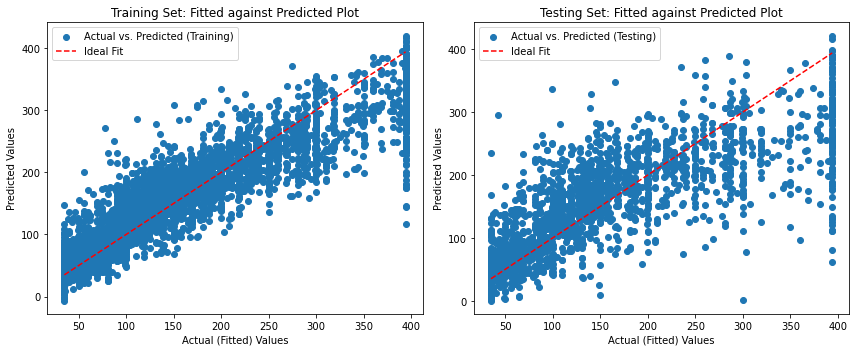

In [38]:
xgb_r4 = XGBRegressor(alpha=800,eta=0.7,reg_lamda=1000,n_estimators=200,subsample=1).fit(X_train,y_train)

model_scores_regression(xgb_r4)

In [ ]:
notebook_end_time = time.time()

notebook_elapsed_time = notebook_end_time-notebook_start_time

minutes, seconds = divmod(notebook_elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))